# Milestone #3: Brett Pfliger

## How did the Buffalo Sabers and Vancouver Canucks play before and after their Covid-19 outbreaks and is there any correlation?

I am a huge hockey fan and am curious to see how the Buffalo Sabers and Vancouver Canucks played after their Covid-19 outbreaks. Both of these teams experianced the most time off due to their outbreaks compared to many other teams and I want to see if that resulted in them playing worse when coming back. 

In [1]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


# Task 1

## Conducting an EDA:

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("How many rows and columns are there:", data.shape)
print("Columns included in this dataset:", data.columns)

How many rows and columns are there: (1736, 13)
Columns included in this dataset: Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [3]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


In [4]:
data.describe(include='object').T

,count,unique,top,freq
Game,1736,868,"2021-01-13 - Blackhawks 1, Lightning 5",2
Team,1736,31,Chicago Blackhawks,56
Unnamed: 2,1736,1,Limited ReportFull Report,1736


# Task 2

## Analysis Pipline:

### In this step, 
- I dropped the columns of 'CF', 'CA', 'SCF', 'SCA', 'PDO', 'Unnamed: 2' as we don't need them

In [5]:
df = data.drop(columns =['CF','CA','SCF','SCA','TOI', 'Unnamed: 2'])
df.shape

(1736, 7)

### In this step for the Vancouver Canucks,
- I dropped all the teams except the Vancouver Canucks to create its own dataframe
- Reset index to make it easier to drop games that arn't needed 
- Dropped all of the games that arn't needed. Know we have Vancouvers 10 games before and 10 games after their outbreak
- Reset index to make it easier to analyze Vancouvers Games and droped the column it added of 'level_0'
- This dataframe gives me the 10 games before the Vancouver Canucks Covid outbreak
- This dataframe gives me the 10 games after the Vancouver Canucks Covid outbreak

In [6]:
Canucks = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Canucks1 = Canucks.reset_index()
Canucks2 = Canucks1.drop(Canucks1.index[0:27]).drop(Canucks1.index[47:56])
Canucks3 = Canucks2.reset_index().drop(columns = "index")
Canucks4 = Canucks3.drop(columns =['level_0'])
CanucksBefore = Canucks4.drop(Canucks3.index[10:20])
CanucksBefore1 = CanucksBefore.reset_index()
CanucksBefore2 = CanucksBefore1.rename(columns={'CF%':"CF% Before",'SCF%':"SCF% Before",'SH%':"SH% Before",'SV%':"SV% Before",'PDO':"PDO Before"}).drop(columns="Team")
CanucksAfter = Canucks4.drop(Canucks3.index[0:10]).drop(Canucks3.index[20:20])
CanucksAfter1 = CanucksAfter.reset_index()
CanucksAfter2 = CanucksAfter1.rename(columns={'CF%':"CF% After",'SCF%':"SCF% After",'SH%':"SH% After",'SV%':"SV% After",'PDO':"PDO After"}).drop(columns="Team")

### In this step for the Vancouver Canucks,
- I added the two seperate data frames of the 10 games before and 10 games after to make the visulization process easier

In [55]:
CanucksBeforeAndAfter = pd.concat([CanucksBefore2,CanucksAfter2], axis=1)

### In this step for the Buffalo Sabres, 
- I dropped all of the teams except the Buffalo Sabres to create its own dataframe
- Reset index to make it easier to drop games that arn't needed for the Buffalo Sabres
- Dropped all of the games that arn't needed. Know we have Buffalos 10 games before and 10 games after their outbreak
- This dataframe gives me the 10 games before the buffalo Sabres Covid outbreak
- This dataframe gives me the 10 games after the Buffalo Sabres Covid outbreak 

In [8]:
Sabres = df.drop(data[data.Team.isin(["Arizona Coyotes", "Vancouver Canucks",  "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Sabres1 = Sabres.reset_index()
Sabres2 = Sabres1.drop(Sabres1.index[20:])
SabresBefore = Sabres2.drop(Sabres2.index[10:20])
SabresBefore1 = SabresBefore.reset_index()
SabresBefore2 = SabresBefore1.rename(columns={'CF%':"CF% Before",'SCF%':"SCF% Before",'SH%':"SH% Before",'SV%':"SV% Before",'PDO':"PDO Before"}).drop(columns="Team")
SabresAfter = Sabres2.drop(Sabres2.index[0:10]).drop(Sabres2.index[20:])
SabresAfter1 = SabresAfter.reset_index()
SabresAfter2 = SabresAfter1.rename(columns={'CF%':"CF% After",'SCF%':"SCF% After",'SH%':"SH% After",'SV%':"SV% After",'PDO':"PDO After"}).drop(columns="Team")

### In this step for the Buffalo Sabres,
- I added the two seperate data frames of the 10 games before and 10 games after to make the visulization process easier

In [53]:
SabresBeforeAndAfter = pd.concat([SabresBefore2,SabresAfter2], axis=1)

# Task 3

## Method Chaining: 

In [10]:
import project_functions1 as pf1

In [11]:
DataFrameProcessed = pf1.load_and_process(path_to_csv_file = "../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
DataFrameProcessed

,Game,Team,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,55.13,62.50,24.00,94.44,1.184


In [12]:
CanucksBeforeFinal = pf1.Canucks_Before_Data(DataFrameProcessed)
CanucksBeforeFinal

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before
0,0,"2021-03-06 - Maple Leafs 2, Canucks 4",42.48,41.51,8.00,94.59,1.026
1,1,"2021-03-08 - Canadiens 1, Canucks 2",39.58,40.00,0.00,100.00,1.000
2,2,"2021-03-10 - Canadiens 5, Canucks 1",34.69,24.00,0.00,89.19,0.892
3,3,"2021-03-13 - Oilers 1, Canucks 2",46.81,41.03,5.00,100.00,1.050
4,4,"2021-03-15 - Canucks 3, Senators 2",40.35,40.32,7.69,97.62,1.053
5,5,"2021-03-17 - Canucks 3, Senators 2",38.68,37.50,7.69,92.31,1.000
6,6,"2021-03-19 - Canucks 3, Canadiens 2",46.15,42.86,8.00,100.00,1.080
7,7,"2021-03-20 - Canucks 4, Canadiens 5",32.04,22.92,23.08,91.18,1.143
8,8,"2021-03-22 - Jets 4, Canucks 0",47.79,42.86,0.00,85.71,0.857
9,9,"2021-03-24 - Jets 5, Canucks 1",62.11,62.22,3.13,91.30,0.944


In [13]:
CanucksAfterFinal = pf1.Canucks_After_Data(DataFrameProcessed)
CanucksAfterFinal

,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,10,"2021-04-18 - Maple Leafs 2, Canucks 3",35.87,33.33,12.50,96.77,1.093
1,11,"2021-04-20 - Maple Leafs 3, Canucks 6",50.53,45.83,16.00,96.97,1.130
2,12,"2021-04-22 - Senators 3, Canucks 0",59.26,55.00,0.00,100.00,1.000
3,13,"2021-04-24 - Senators 2, Canucks 4",42.53,32.43,8.70,88.89,0.976
4,14,"2021-04-26 - Canucks 1, Senators 2",44.05,30.00,4.55,91.67,0.962
5,15,"2021-04-28 - Canucks 3, Senators 6",40.22,28.95,16.67,81.48,0.981
6,16,"2021-04-29 - Canucks 1, Maple Leafs 4",42.55,40.00,0.00,83.33,0.833
7,17,"2021-05-01 - Canucks 1, Maple Leafs 5",52.27,48.98,4.35,86.21,0.906
8,18,"2021-05-03 - Oilers 5, Canucks 3",40.20,37.25,10.00,87.10,0.971
9,19,"2021-05-04 - Oilers 4, Canucks 1",48.28,42.86,4.55,90.48,0.950


In [14]:
CanucksBandA = pf1.Canucks_Before_And_After(DataFrameProcessed)
CanucksBandA

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,0,"2021-03-06 - Maple Leafs 2, Canucks 4",42.48,41.51,8.00,94.59,1.026,10,"2021-04-18 - Maple Leafs 2, Canucks 3",35.87,33.33,12.50,96.77,1.093
1,1,"2021-03-08 - Canadiens 1, Canucks 2",39.58,40.00,0.00,100.00,1.000,11,"2021-04-20 - Maple Leafs 3, Canucks 6",50.53,45.83,16.00,96.97,1.130
2,2,"2021-03-10 - Canadiens 5, Canucks 1",34.69,24.00,0.00,89.19,0.892,12,"2021-04-22 - Senators 3, Canucks 0",59.26,55.00,0.00,100.00,1.000
3,3,"2021-03-13 - Oilers 1, Canucks 2",46.81,41.03,5.00,100.00,1.050,13,"2021-04-24 - Senators 2, Canucks 4",42.53,32.43,8.70,88.89,0.976
4,4,"2021-03-15 - Canucks 3, Senators 2",40.35,40.32,7.69,97.62,1.053,14,"2021-04-26 - Canucks 1, Senators 2",44.05,30.00,4.55,91.67,0.962
5,5,"2021-03-17 - Canucks 3, Senators 2",38.68,37.50,7.69,92.31,1.000,15,"2021-04-28 - Canucks 3, Senators 6",40.22,28.95,16.67,81.48,0.981
6,6,"2021-03-19 - Canucks 3, Canadiens 2",46.15,42.86,8.00,100.00,1.080,16,"2021-04-29 - Canucks 1, Maple Leafs 4",42.55,40.00,0.00,83.33,0.833
7,7,"2021-03-20 - Canucks 4, Canadiens 5",32.04,22.92,23.08,91.18,1.143,17,"2021-05-01 - Canucks 1, Maple Leafs 5",52.27,48.98,4.35,86.21,0.906
8,8,"2021-03-22 - Jets 4, Canucks 0",47.79,42.86,0.00,85.71,0.857,18,"2021-05-03 - Oilers 5, Canucks 3",40.20,37.25,10.00,87.10,0.971
9,9,"2021-03-24 - Jets 5, Canucks 1",62.11,62.22,3.13,91.30,0.944,19,"2021-05-04 - Oilers 4, Canucks 1",48.28,42.86,4.55,90.48,0.950


In [15]:
SabresBeforeFinal = pf1.Sabres_Before_Data(DataFrameProcessed)
SabresBeforeFinal

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before
0,0,"2021-01-14 - Capitals 6, Sabres 4",51.47,55.17,10.53,80.95,0.915
1,1,"2021-01-15 - Capitals 2, Sabres 1",51.43,55.56,4.55,90.48,0.950
2,2,"2021-01-18 - Sabres 6, Flyers 1",49.00,54.55,12.90,95.24,1.081
3,3,"2021-01-19 - Sabres 0, Flyers 3",59.38,58.14,0.00,91.67,0.917
4,4,"2021-01-22 - Sabres 3, Capitals 4",53.85,61.29,13.64,88.00,1.016
5,5,"2021-01-24 - Sabres 4, Capitals 3",56.18,42.86,0.00,94.74,0.947
6,6,"2021-01-26 - Rangers 2, Sabres 3",50.79,63.33,6.67,91.30,0.980
7,7,"2021-01-28 - Rangers 3, Sabres 2",41.67,37.04,5.00,96.15,1.012
8,8,"2021-01-30 - Devils 3, Sabres 4",49.32,51.72,10.00,90.48,1.005
9,9,"2021-01-31 - Devils 5, Sabres 3",43.75,36.36,4.35,88.24,0.926


In [16]:
SabresAfterFinal = pf1.Sabres_After_Data(DataFrameProcessed)
SabresAfterFinal

,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,10,"2021-02-15 - Islanders 3, Sabres 1",44.05,37.93,0.00,92.00,0.920
1,11,"2021-02-16 - Islanders 3, Sabres 0",57.14,54.76,0.00,89.47,0.895
2,12,"2021-02-18 - Sabres 1, Capitals 3",48.78,44.74,0.00,94.12,0.941
3,13,"2021-02-20 - Sabres 3, Devils 2",50.00,52.63,7.41,95.45,1.029
4,14,"2021-02-22 - Sabres 2, Islanders 3",48.19,44.68,4.35,90.48,0.948
5,15,"2021-02-23 - Sabres 4, Devils 1",47.12,53.06,6.25,100.00,1.063
6,16,"2021-02-25 - Devils 4, Sabres 3",40.45,26.67,4.35,93.94,0.983
7,17,"2021-02-27 - Flyers 3, Sabres 0",45.98,50.00,0.00,90.32,0.903
8,18,"2021-02-28 - Flyers 3, Sabres 0",44.30,40.00,0.00,90.32,0.903
9,19,"2021-03-02 - Sabres 2, Rangers 3",63.22,60.00,10.53,82.35,0.929


In [17]:
SabresBandA = pf1.Sabres_Before_After(DataFrameProcessed)
SabresBandA

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,0,"2021-01-14 - Capitals 6, Sabres 4",51.47,55.17,10.53,80.95,0.915,10,"2021-02-15 - Islanders 3, Sabres 1",44.05,37.93,0.00,92.00,0.920
1,1,"2021-01-15 - Capitals 2, Sabres 1",51.43,55.56,4.55,90.48,0.950,11,"2021-02-16 - Islanders 3, Sabres 0",57.14,54.76,0.00,89.47,0.895
2,2,"2021-01-18 - Sabres 6, Flyers 1",49.00,54.55,12.90,95.24,1.081,12,"2021-02-18 - Sabres 1, Capitals 3",48.78,44.74,0.00,94.12,0.941
3,3,"2021-01-19 - Sabres 0, Flyers 3",59.38,58.14,0.00,91.67,0.917,13,"2021-02-20 - Sabres 3, Devils 2",50.00,52.63,7.41,95.45,1.029
4,4,"2021-01-22 - Sabres 3, Capitals 4",53.85,61.29,13.64,88.00,1.016,14,"2021-02-22 - Sabres 2, Islanders 3",48.19,44.68,4.35,90.48,0.948
5,5,"2021-01-24 - Sabres 4, Capitals 3",56.18,42.86,0.00,94.74,0.947,15,"2021-02-23 - Sabres 4, Devils 1",47.12,53.06,6.25,100.00,1.063
6,6,"2021-01-26 - Rangers 2, Sabres 3",50.79,63.33,6.67,91.30,0.980,16,"2021-02-25 - Devils 4, Sabres 3",40.45,26.67,4.35,93.94,0.983
7,7,"2021-01-28 - Rangers 3, Sabres 2",41.67,37.04,5.00,96.15,1.012,17,"2021-02-27 - Flyers 3, Sabres 0",45.98,50.00,0.00,90.32,0.903
8,8,"2021-01-30 - Devils 3, Sabres 4",49.32,51.72,10.00,90.48,1.005,18,"2021-02-28 - Flyers 3, Sabres 0",44.30,40.00,0.00,90.32,0.903
9,9,"2021-01-31 - Devils 5, Sabres 3",43.75,36.36,4.35,88.24,0.926,19,"2021-03-02 - Sabres 2, Rangers 3",63.22,60.00,10.53,82.35,0.929


In [18]:
CovidDescribeCBF = pf1.Describe(CanucksBeforeFinal)
CovidDescribeCBF

,count,mean,std,min,25%,50%,75%,max
index,10.0,4.5000,3.027650,0.000,2.2500,4.500,6.75000,9.000
CF% Before,10.0,43.0680,8.428510,32.040,38.9050,41.415,46.64500,62.110
SCF% Before,10.0,39.5220,10.879249,22.920,38.1250,40.675,42.52250,62.220
SH% Before,10.0,6.2590,6.847584,0.000,0.7825,6.345,7.92250,23.080
SV% Before,10.0,94.1900,5.066779,85.710,91.2100,93.450,99.40500,100.000
PDO Before,10.0,1.0045,0.086846,0.857,0.9580,1.013,1.05225,1.143


In [19]:
CovidDescribeCAF = pf1.Describe(CanucksAfterFinal)
CovidDescribeCAF

,count,mean,std,min,25%,50%,75%,max
index,10.0,14.5000,3.027650,10.000,12.2500,14.5000,16.75000,19.00
CF% After,10.0,45.5760,6.963981,35.870,40.7975,43.3000,49.96750,59.26
SCF% After,10.0,39.4630,8.669128,28.950,32.6550,38.6250,45.08750,55.00
SH% After,10.0,7.7320,6.039851,0.000,4.4000,6.6250,11.87500,16.67
SV% After,10.0,90.2900,6.125335,81.480,86.4325,89.6850,95.49500,100.00
PDO After,10.0,0.9802,0.084377,0.833,0.9530,0.9735,0.99525,1.13


In [20]:
CovidDescribeSBF = pf1.Describe(SabresBeforeFinal)
CovidDescribeSBF

,count,mean,std,min,25%,50%,75%,max
index,10.0,4.5000,3.027650,0.000,2.25000,4.500,6.75000,9.000
CF% Before,10.0,50.6840,5.281671,41.670,49.08000,51.110,53.25500,59.380
SCF% Before,10.0,51.6020,9.615050,36.360,45.07500,54.860,57.49500,63.330
SH% Before,10.0,6.7640,4.886915,0.000,4.40000,5.835,10.39750,13.640
SV% Before,10.0,90.7250,4.427581,80.950,88.80000,90.890,93.97250,96.150
PDO Before,10.0,0.9749,0.053733,0.915,0.93125,0.965,1.01025,1.081


In [21]:
CovidDescribeSAF = pf1.Describe(SabresAfterFinal)
CovidDescribeSAF

,count,mean,std,min,25%,50%,75%,max
index,10.0,14.5000,3.027650,10.000,12.25000,14.500,16.75000,19.000
CF% After,10.0,48.9230,6.687160,40.450,44.72000,47.655,49.69500,63.220
SCF% After,10.0,46.4470,9.767542,26.670,41.17000,47.370,52.95250,60.000
SH% After,10.0,3.2890,3.866110,0.000,0.00000,2.175,5.77500,10.530
SV% After,10.0,91.8450,4.611566,82.350,90.32000,91.240,94.07500,100.000
PDO After,10.0,0.9514,0.056714,0.895,0.90725,0.935,0.97425,1.063


# Task 4

## Analysis To Answer Research Question:

### Vancouver Canucks Before and After Covid-19 Outbreak:

In [76]:
CanucksBandA
# Canucks Before and After Covid Outbreak 

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,0,"2021-03-06 - Maple Leafs 2, Canucks 4",42.48,41.51,8.00,94.59,1.026,10,"2021-04-18 - Maple Leafs 2, Canucks 3",35.87,33.33,12.50,96.77,1.093
1,1,"2021-03-08 - Canadiens 1, Canucks 2",39.58,40.00,0.00,100.00,1.000,11,"2021-04-20 - Maple Leafs 3, Canucks 6",50.53,45.83,16.00,96.97,1.130
2,2,"2021-03-10 - Canadiens 5, Canucks 1",34.69,24.00,0.00,89.19,0.892,12,"2021-04-22 - Senators 3, Canucks 0",59.26,55.00,0.00,100.00,1.000
3,3,"2021-03-13 - Oilers 1, Canucks 2",46.81,41.03,5.00,100.00,1.050,13,"2021-04-24 - Senators 2, Canucks 4",42.53,32.43,8.70,88.89,0.976
4,4,"2021-03-15 - Canucks 3, Senators 2",40.35,40.32,7.69,97.62,1.053,14,"2021-04-26 - Canucks 1, Senators 2",44.05,30.00,4.55,91.67,0.962
5,5,"2021-03-17 - Canucks 3, Senators 2",38.68,37.50,7.69,92.31,1.000,15,"2021-04-28 - Canucks 3, Senators 6",40.22,28.95,16.67,81.48,0.981
6,6,"2021-03-19 - Canucks 3, Canadiens 2",46.15,42.86,8.00,100.00,1.080,16,"2021-04-29 - Canucks 1, Maple Leafs 4",42.55,40.00,0.00,83.33,0.833
7,7,"2021-03-20 - Canucks 4, Canadiens 5",32.04,22.92,23.08,91.18,1.143,17,"2021-05-01 - Canucks 1, Maple Leafs 5",52.27,48.98,4.35,86.21,0.906
8,8,"2021-03-22 - Jets 4, Canucks 0",47.79,42.86,0.00,85.71,0.857,18,"2021-05-03 - Oilers 5, Canucks 3",40.20,37.25,10.00,87.10,0.971
9,9,"2021-03-24 - Jets 5, Canucks 1",62.11,62.22,3.13,91.30,0.944,19,"2021-05-04 - Oilers 4, Canucks 1",48.28,42.86,4.55,90.48,0.950


In [75]:
CovidDescribeCBF
#Canucks Before Covid Statistics

,count,mean,std,min,25%,50%,75%,max
index,10.0,4.5000,3.027650,0.000,2.2500,4.500,6.75000,9.000
CF% Before,10.0,43.0680,8.428510,32.040,38.9050,41.415,46.64500,62.110
SCF% Before,10.0,39.5220,10.879249,22.920,38.1250,40.675,42.52250,62.220
SH% Before,10.0,6.2590,6.847584,0.000,0.7825,6.345,7.92250,23.080
SV% Before,10.0,94.1900,5.066779,85.710,91.2100,93.450,99.40500,100.000
PDO Before,10.0,1.0045,0.086846,0.857,0.9580,1.013,1.05225,1.143


In [30]:
CovidDescribeCAF
#Canucks After Covid Statistics

,count,mean,std,min,25%,50%,75%,max
index,10.0,14.5000,3.027650,10.000,12.2500,14.5000,16.75000,19.00
CF% After,10.0,45.5760,6.963981,35.870,40.7975,43.3000,49.96750,59.26
SCF% After,10.0,39.4630,8.669128,28.950,32.6550,38.6250,45.08750,55.00
SH% After,10.0,7.7320,6.039851,0.000,4.4000,6.6250,11.87500,16.67
SV% After,10.0,90.2900,6.125335,81.480,86.4325,89.6850,95.49500,100.00
PDO After,10.0,0.9802,0.084377,0.833,0.9530,0.9735,0.99525,1.13


#### Vancouver Canucks Visuals:
The Vancouver Canucks had 24 days off between games due to their Covid-19 outbreak. From the data, it is clear that the team didn’t play well due to their time off. This can be decided by looking at the variables of CF% (corsi percentage), SCF% (scoring chances for %), SH% (shooting percentage), SV% (save percentage), and PDO (SH% vs. SV%).

/var/folders/bj/1qb21b6n1nlcg8tl_ls_mjrm0000gn/T/ipykernel_59364/1515322099.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CanucksBandA.mean().plot(kind='bar')


<AxesSubplot:>

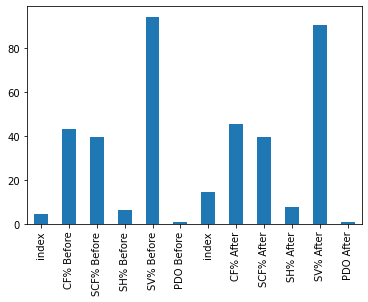

In [48]:
CanucksBandA.mean().plot(kind='bar')

#### CF% (Corsi):
CF% (corsi) is used to evaluate the teams puck possession on the ice in a 5v5 setting. It is calculated by the teams total sum of shots on goal, missed shots, and blocked shots over the shots against, missed shots against and blocked shots against at 5v5. The average rank of corsi is 40 to 60%. A team/player ranked above 55% is considered elite or very good. Vancouver’s CF% has seemed to increase after their 24 days off with their CF% increasing 2.5% from 43.1% to 45.6%. Vancouver doesn’t have a very high ranked coris to begin with, but does have one high outlier at 62.11% before the outbreak. Their CF% does seem to gain more variance and contain a larger range of values after the outbreak.

<AxesSubplot:>

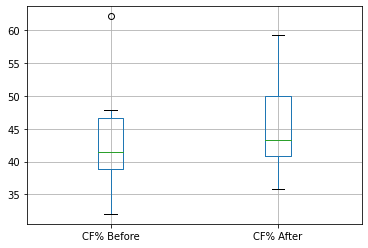

In [35]:
CanucksBandA.boxplot(['CF% Before','CF% After'])

#### SCF% (Scoring Chances For Percentage):
SCF% (scoring chances for percentage)  is a percentage of total scoring chances in games that team played for that team. It takes into account the rate of scoring chances for and against at 60 minutes time on ice. Vancouver’s SCF% fell after their outbreak but not by much. There is a larger range of values after their outbreak compared to before and much more outliers exist before the Covid-19 outbreak.

<AxesSubplot:>

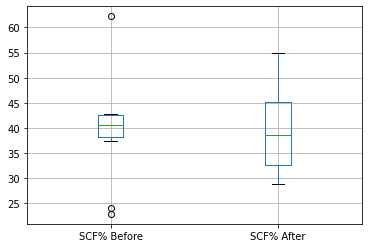

In [32]:
CanucksBandA.boxplot(['SCF% Before','SCF% After'])

<AxesSubplot:>

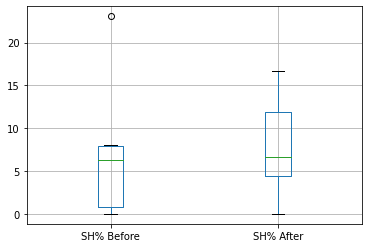

In [37]:
CanucksBandA.boxplot(['SH% Before','SH% After'])

<AxesSubplot:>

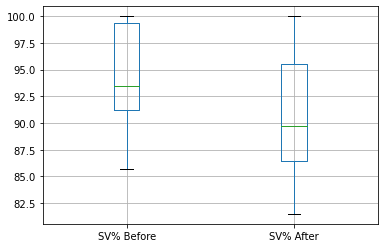

In [38]:
CanucksBandA.boxplot(['SV% Before','SV% After'])

<AxesSubplot:>

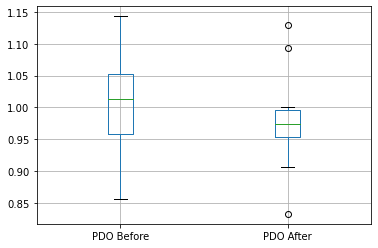

In [39]:
CanucksBandA.boxplot(['PDO Before','PDO After'])

### Buffalo Sabres Before and After Covid-19 Outbreak:

In [56]:
SabresBandA

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,0,"2021-01-14 - Capitals 6, Sabres 4",51.47,55.17,10.53,80.95,0.915,10,"2021-02-15 - Islanders 3, Sabres 1",44.05,37.93,0.00,92.00,0.920
1,1,"2021-01-15 - Capitals 2, Sabres 1",51.43,55.56,4.55,90.48,0.950,11,"2021-02-16 - Islanders 3, Sabres 0",57.14,54.76,0.00,89.47,0.895
2,2,"2021-01-18 - Sabres 6, Flyers 1",49.00,54.55,12.90,95.24,1.081,12,"2021-02-18 - Sabres 1, Capitals 3",48.78,44.74,0.00,94.12,0.941
3,3,"2021-01-19 - Sabres 0, Flyers 3",59.38,58.14,0.00,91.67,0.917,13,"2021-02-20 - Sabres 3, Devils 2",50.00,52.63,7.41,95.45,1.029
4,4,"2021-01-22 - Sabres 3, Capitals 4",53.85,61.29,13.64,88.00,1.016,14,"2021-02-22 - Sabres 2, Islanders 3",48.19,44.68,4.35,90.48,0.948
5,5,"2021-01-24 - Sabres 4, Capitals 3",56.18,42.86,0.00,94.74,0.947,15,"2021-02-23 - Sabres 4, Devils 1",47.12,53.06,6.25,100.00,1.063
6,6,"2021-01-26 - Rangers 2, Sabres 3",50.79,63.33,6.67,91.30,0.980,16,"2021-02-25 - Devils 4, Sabres 3",40.45,26.67,4.35,93.94,0.983
7,7,"2021-01-28 - Rangers 3, Sabres 2",41.67,37.04,5.00,96.15,1.012,17,"2021-02-27 - Flyers 3, Sabres 0",45.98,50.00,0.00,90.32,0.903
8,8,"2021-01-30 - Devils 3, Sabres 4",49.32,51.72,10.00,90.48,1.005,18,"2021-02-28 - Flyers 3, Sabres 0",44.30,40.00,0.00,90.32,0.903
9,9,"2021-01-31 - Devils 5, Sabres 3",43.75,36.36,4.35,88.24,0.926,19,"2021-03-02 - Sabres 2, Rangers 3",63.22,60.00,10.53,82.35,0.929


In [58]:
CovidDescribeSBF

,count,mean,std,min,25%,50%,75%,max
index,10.0,4.5000,3.027650,0.000,2.25000,4.500,6.75000,9.000
CF% Before,10.0,50.6840,5.281671,41.670,49.08000,51.110,53.25500,59.380
SCF% Before,10.0,51.6020,9.615050,36.360,45.07500,54.860,57.49500,63.330
SH% Before,10.0,6.7640,4.886915,0.000,4.40000,5.835,10.39750,13.640
SV% Before,10.0,90.7250,4.427581,80.950,88.80000,90.890,93.97250,96.150
PDO Before,10.0,0.9749,0.053733,0.915,0.93125,0.965,1.01025,1.081


In [59]:
CovidDescribeSAF

,count,mean,std,min,25%,50%,75%,max
index,10.0,14.5000,3.027650,10.000,12.25000,14.500,16.75000,19.000
CF% After,10.0,48.9230,6.687160,40.450,44.72000,47.655,49.69500,63.220
SCF% After,10.0,46.4470,9.767542,26.670,41.17000,47.370,52.95250,60.000
SH% After,10.0,3.2890,3.866110,0.000,0.00000,2.175,5.77500,10.530
SV% After,10.0,91.8450,4.611566,82.350,90.32000,91.240,94.07500,100.000
PDO After,10.0,0.9514,0.056714,0.895,0.90725,0.935,0.97425,1.063


/var/folders/bj/1qb21b6n1nlcg8tl_ls_mjrm0000gn/T/ipykernel_59364/3868419651.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SabresBandA.mean().plot(kind='bar')


<AxesSubplot:>

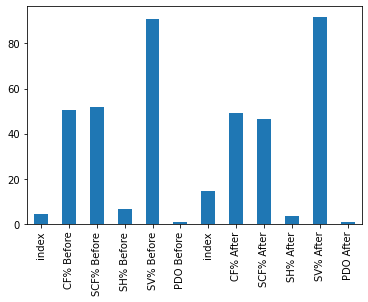

In [61]:
SabresBandA.mean().plot(kind='bar')

<AxesSubplot:>

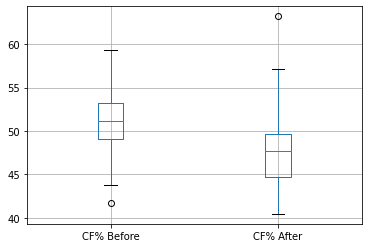

In [64]:
SabresBandA.boxplot(['CF% Before','CF% After'])

<AxesSubplot:>

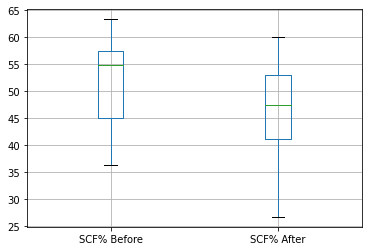

In [70]:
SabresBandA.boxplot(['SCF% Before','SCF% After'])

<AxesSubplot:>

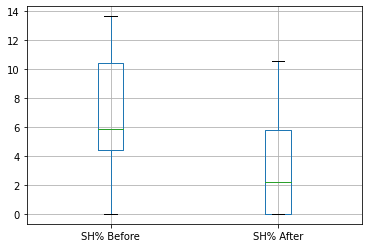

In [66]:
SabresBandA.boxplot(['SH% Before','SH% After'])

<AxesSubplot:>

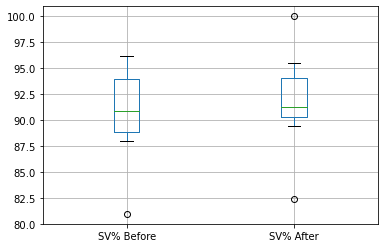

In [67]:
SabresBandA.boxplot(['SV% Before','SV% After'])

<AxesSubplot:>

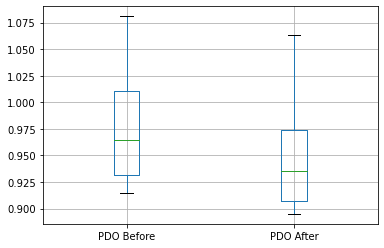

In [68]:
SabresBandA.boxplot(['PDO Before','PDO After'])